In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Train data
with open('train_x.npy', 'rb') as fname:
    train_x = np.load(fname)
    
with open('train_y_mkp.npy', 'rb') as fname:
    train_y_mkp = np.load(fname)

with open('train_y_loc.npy', 'rb') as fname:
    train_y_loc = np.load(fname)
    
    
# Test data
with open('test_x.npy', 'rb') as fname:
    test_x = np.load(fname)
    
with open('test_y_mkp.npy', 'rb') as fname:
    test_y_mkp = np.load(fname)

with open('test_y_loc.npy', 'rb') as fname:
    test_y_loc = np.load(fname)

print("%g datapoints loaded for training\n" % len(train_x))
print("%g datapoints loaded for testing" % len(test_x))

167734 datapoints loaded for training

72346 datapoints loaded for testing


In [4]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y_mkp)





KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [5]:
y_pred = neigh.predict(test_x)

## MAE

In [6]:
mae = np.mean(np.abs(y_pred - test_y_mkp))
print("Mean Absolute Error: %g" % mae)

Mean Absolute Error: 7.94482


## MSE

In [7]:
mse = np.mean((y_pred - test_y_mkp) ** 2)
print("Mean Square Error: %g" % mse)

Mean Square Error: 153.449


## MAPE

In [8]:
mape = np.mean(np.abs((test_y_mkp - y_pred) / test_y_mkp))
print("Mean Absolute Percentage Error: %g%%" % (mape*100))

Mean Absolute Percentage Error: 63.4655%


## RMSE

In [9]:
rmse = np.sqrt(np.mean((y_pred - test_y_mkp) ** 2))
print("Root Mean Square Error: %g" % rmse)

Root Mean Square Error: 12.3874


## R-square

In [10]:
r2 = 1 - np.sum((test_y_mkp - y_pred) ** 2) / np.sum((np.mean(test_y_mkp) - y_pred) ** 2)
print("R2: %g" % r2)

R2: 0.804475


In [11]:
np.sum(y_pred>test_y_loc) / y_pred.shape[0]

0.70614823210682

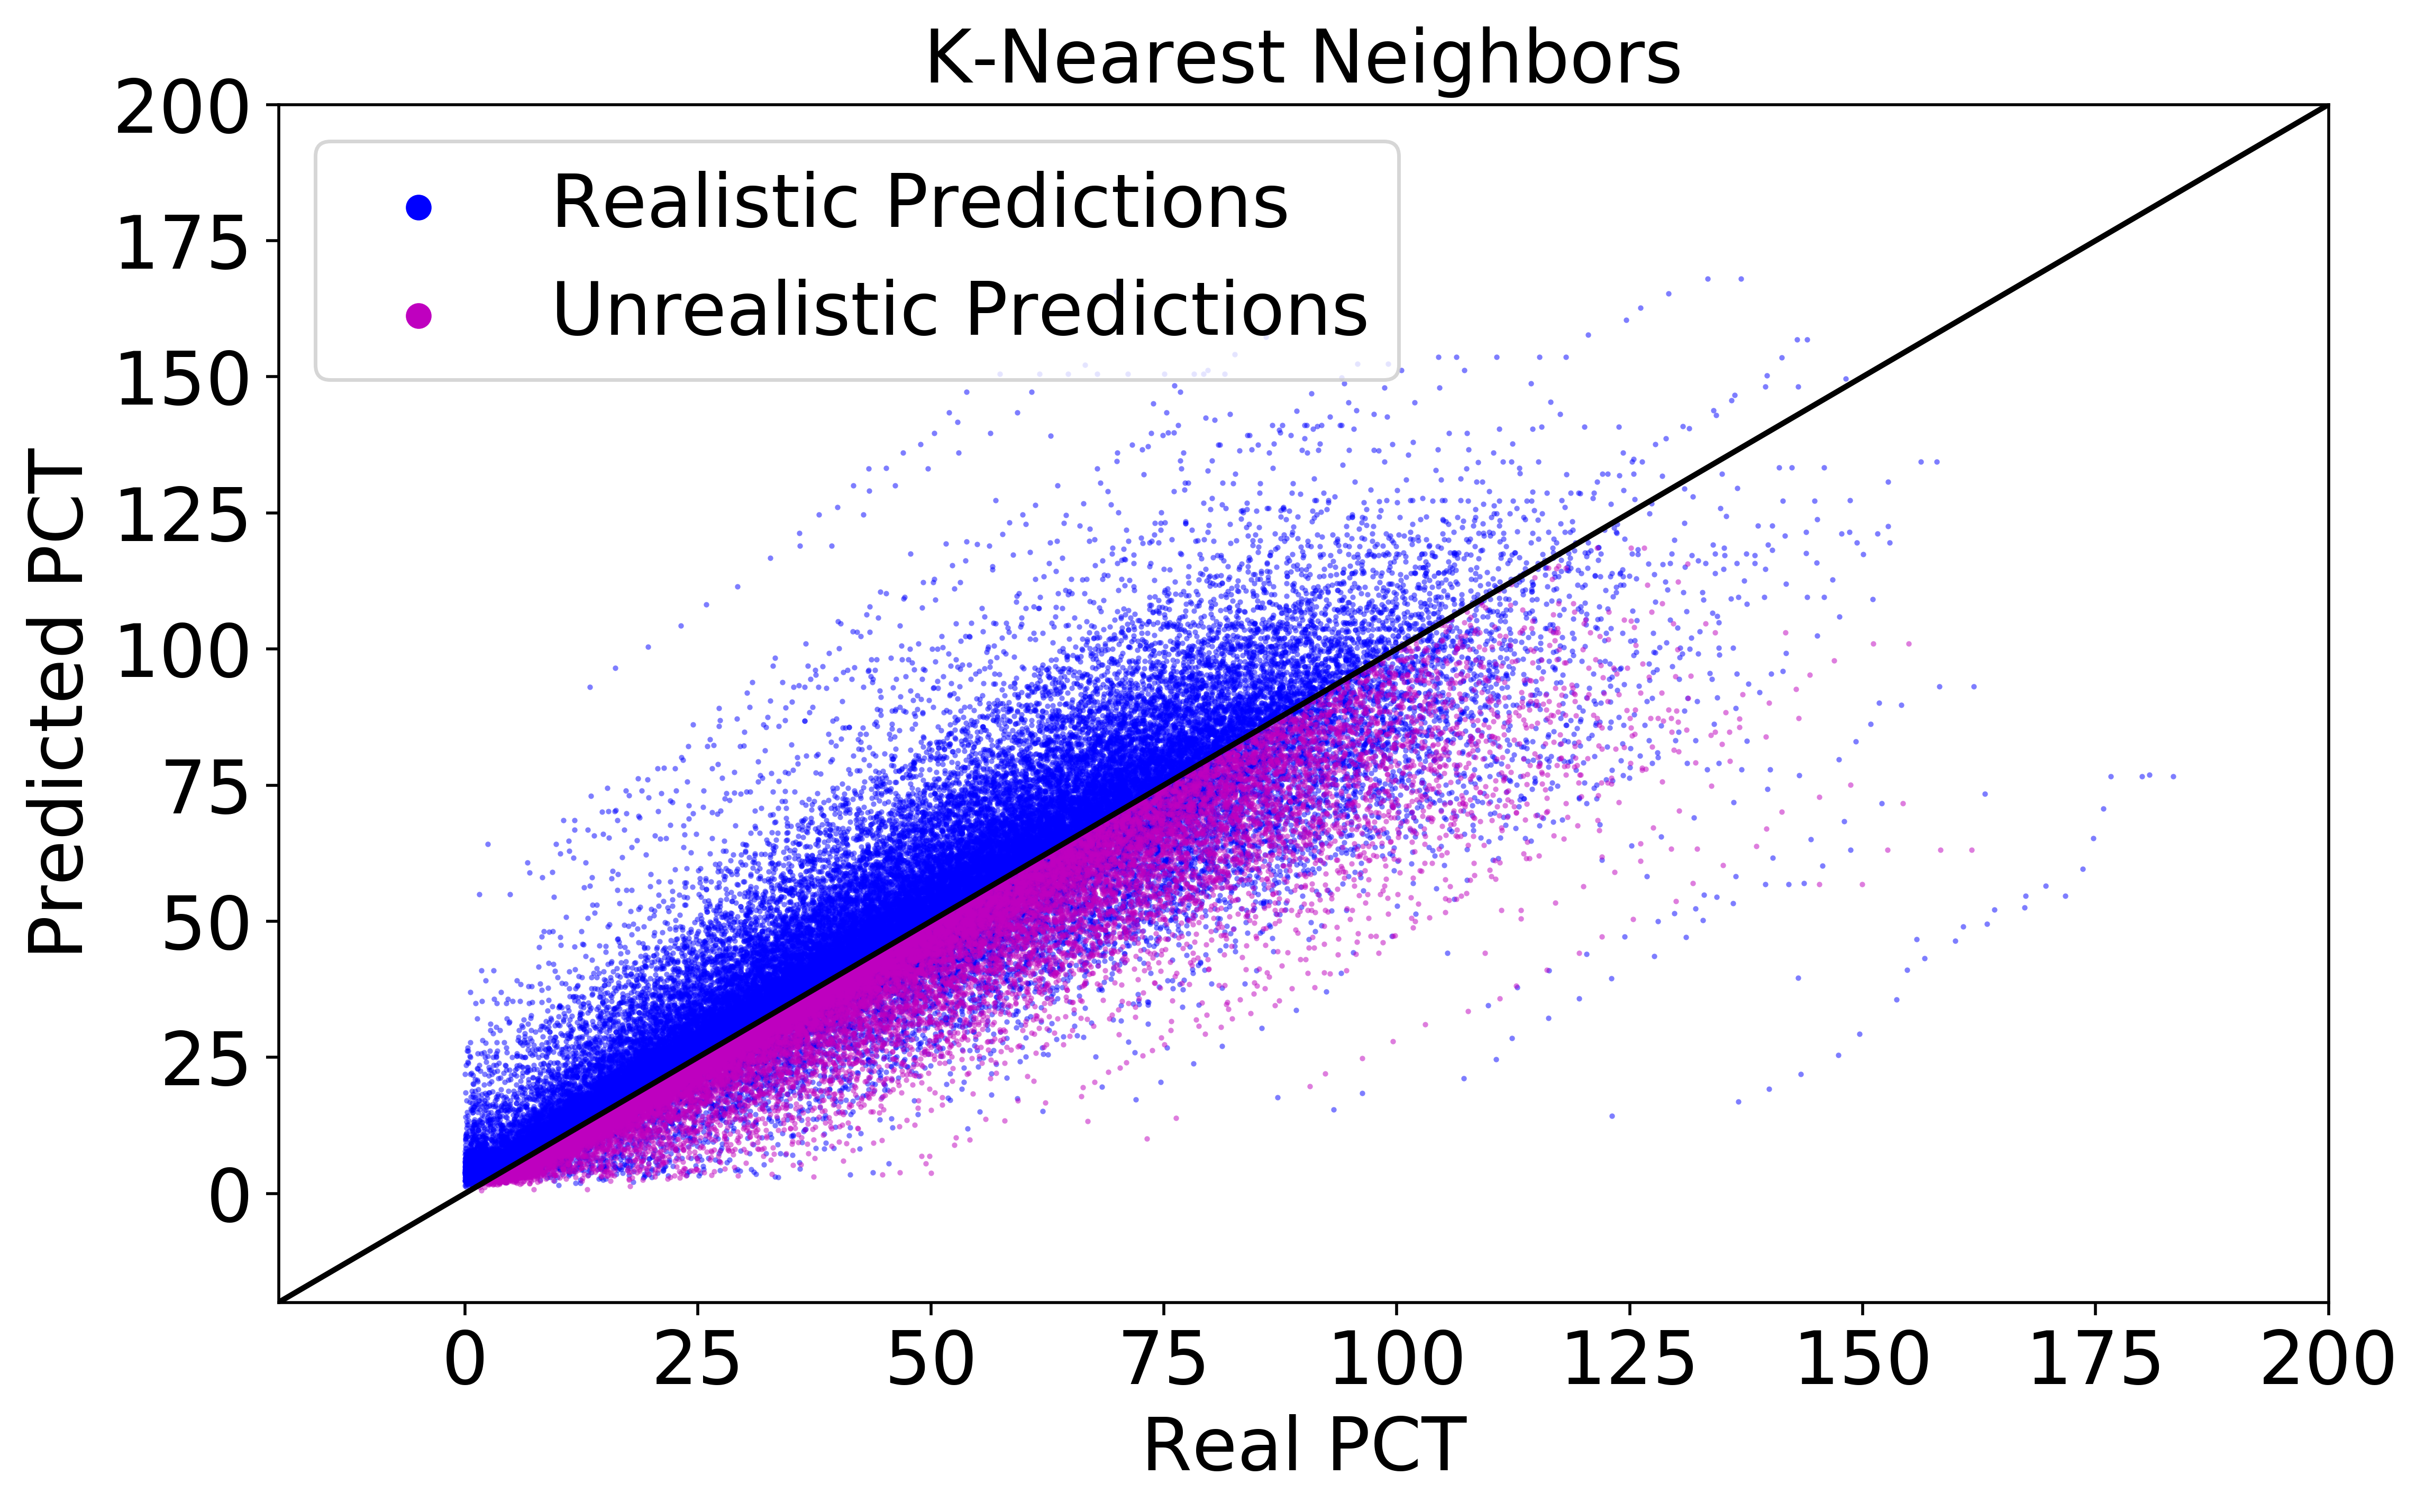

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

alpha = 0.5

ax.scatter([1000], [1000], color='blue', marker='o')
ax.scatter([1000], [1000], color='m', marker='o')
ax.legend(['Realistic Predictions', 'Unrealistic Predictions'], fontsize=20)

ax.scatter(test_y_mkp[y_pred>=test_y_loc], y_pred[y_pred>=test_y_loc], marker='.', alpha=alpha, color='blue', s=1)
ax.scatter(test_y_mkp[y_pred<test_y_loc], y_pred[y_pred<test_y_loc], marker='.', alpha=alpha, color='m', s=1)


ax.plot([-20, 200], [-20, 200], color='black')
ax.set_xlim([-20, 200])
ax.set_ylim([-20, 200])

ax.set_title('K-Nearest Neighbors', fontsize=20)
ax.set_xlabel('Real PCT', fontsize=20)
ax.set_ylabel('Predicted PCT', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
fig.savefig("knn.png")
plt.show()